# Выполнила Натела Кордзахия БЭК181

# Домашнее задание №2: линейная регрессия и векторное дифференцирование (10 баллов).

**Дедлайн для всех групп: 29 сентября в 23:59**

* Максимальное количество баллов за задания в ноутбуке - 11, но больше 10 оценка не ставится, поэтому для получения максимальной оценки можно сделать не все задания.

* Некоторые задания будут по вариантам (всего 4 варианта). Чтобы выяснить свой вариант, посчитайте количество букв в своей фамилии, возьмете остаток от деления на 4 и прибавьте 1.

### Работу выполнила Кордзахия Натела БЭК181

In [6]:
import numpy as np

## Многомерная линейная регрессия из sklearn

Применим многомерную регрессию из sklearn для стандартного датасета

In [7]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples = 10000)
print(X.shape, y.shape)

(10000, 100) (10000,)


Просто посмотреть на это чудо хочется

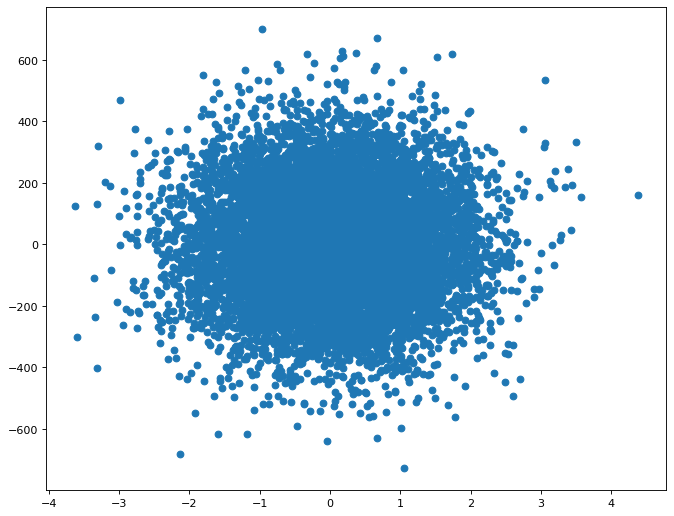

In [36]:
from matplotlib import pylab as plt
from matplotlib.pyplot import figure

figure(figsize=(10, 8), dpi=80)

plt.scatter(X[:,0],y)

У нас 10000 объектов и 100 признаков. Для начала решим задачу аналитически "из коробки".

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression().fit(X, y)
print(mean_squared_error(y, reg.predict(X)))

1.0769037175847933e-25


Теперь попробуем обучить линейную регрессию методом градиентного спуска "из коробки"

In [165]:
from sklearn.linear_model import SGDRegressor
reg = SGDRegressor(alpha=0.00000001).fit(X, y)
print(mean_squared_error(y, reg.predict(X)))
reg.coef_

2.9784222785618077e-12


array([ 5.80926923e-08,  4.33175016e-08, -4.57284056e-08, -1.10868004e-08,
       -4.52766709e-08,  1.90075943e-08,  4.36123512e-08,  9.42715706e-10,
        1.16023830e-08, -2.51111423e-08, -8.93506583e-08, -2.69573102e-08,
       -2.54629010e-08,  7.80319179e+01,  2.36510828e-09, -1.81621000e-09,
        3.71188700e-08, -7.06838036e-10, -1.36939392e-08, -2.34544173e-08,
       -9.28414174e-08, -4.73344672e-08, -4.51506435e-09,  8.16412079e+01,
        4.82618713e+01,  4.90296943e-08,  2.13615605e-08, -1.98681435e-08,
       -2.42572779e-08,  3.07227086e-09, -3.12103022e-09, -2.22542442e-09,
        6.48390174e-08,  1.21391626e-08,  3.12232354e-09,  6.51290576e-08,
       -1.26866852e-08,  2.90597545e-08, -4.13226247e-10,  5.00622536e-09,
        4.56375182e+01,  1.21931365e-08, -1.52256545e-08,  1.27800715e-08,
        4.28760417e-08,  1.14825768e-08,  5.36416802e-08,  1.26537825e-08,
        1.91831567e-08, -1.80645705e-09, -8.20866333e-09, -6.45365842e-10,
       -3.08791631e-08,  

***Задание 1 (0.5 балла).*** Объясните, чем вызвано различие двух полученных значений метрики?

Эти два подхода реализуются по-разному. Для градиентного спуска важна точка старта и количество итераций, еще поиск минимума происходит зигзагообразно. В модели из коробки с нашими изначальными параметрами могло произойти нехватка итераций или попадение с локальный минимум. 


***Задание 2 (0.5 балла).*** Подберите гиперпараметры в методе градиентного спуска так, чтобы значение MSE было близко к значению MSE, полученному при обучении LinearRegression.

In [259]:
from sklearn.linear_model import SGDRegressor
reg = SGDRegressor(alpha=0.00000001, l1_ratio = 0.001, max_iter = 100000).fit(X, y)
print(mean_squared_error(y, reg.predict(X)))
reg.coef_


2.9769115208145987e-12


array([ 3.26585946e-08,  4.19634111e-08,  5.65633012e-09,  3.14163093e-09,
       -1.98327945e-08,  1.59898272e-08,  4.52927133e-08,  5.30672612e-08,
        2.40100683e-08,  7.68176659e-09, -1.61988799e-09, -2.43685080e-08,
       -1.66945104e-08,  7.80319179e+01,  2.99279654e-08,  4.03837242e-08,
       -3.04500401e-08, -2.54959406e-08,  8.40021661e-08, -8.75484758e-09,
       -2.98483061e-08, -3.52019097e-08, -2.45211118e-08,  8.16412079e+01,
        4.82618713e+01, -1.48779979e-08, -1.96059342e-08,  2.47945897e-08,
        5.07918504e-09, -1.75877910e-08,  1.94912265e-08, -1.82448162e-08,
        4.92061509e-08, -4.71518694e-08, -4.36321760e-08, -4.91384326e-08,
       -2.18035778e-08,  3.99268257e-08, -5.91637115e-09, -1.18029835e-09,
        4.56375182e+01,  1.11364014e-10,  4.70112383e-08, -5.23644270e-09,
       -1.18138294e-08,  2.93184226e-08,  3.29762372e-11,  2.47746182e-09,
        4.15290249e-08,  3.45330050e-08,  4.60059100e-10, -2.61521463e-08,
       -2.30236631e-08,  

In [15]:
a = abs(2.9784222785618077e-12-2.9769115208145987e-12)*100
print(f'Разница полученных MSE оценок равна примерно {a} - достаточно маленькая разница')

Разница полученных MSE оценок равна примерно 1.5107577472089176e-13 - достаточно маленькая разница


## Ваша многомерная линейная регрессия

In [36]:
print('У меня ' + str(len('Кордзахия') % 4 + 1) + ' вариант')

У меня 2 вариант


***Задание 3 (5 баллов)***. Напишите собственную многомерную линейную регрессию, оптимизирующую MSE методом *градиентного спуска*. Для этого используйте шаблонный класс. 

Критерий останова: либо норма разности весов на текущей и предыдущей итерациях меньше определенного значения (первый и третий варианты), либо модуль разности функционалов качества (MSE) на текущей и предыдущей итерациях меньше определенного значения (второй и четвертый варианты). Также предлагается завершать обучение в любом случае, если было произведено слишком много итераций.

***Задание 4 (2 балла)***. Добавьте l1 (первый и второй варианты) или l2 (третий и четвертый варианты) регуляризацию.

In [38]:
class LinearRegression(object):
    def __init__(self, alpha=0.01, lr=0.0000000000000001, tol=0.00001, max_iter=100000):
        '''
        Для начала необходимо инициализировать параметры
        alpha - это learning rate или шаг обучения
        lr - параметр регуляризации
        tol - значение для критерия останова
        max_iter - максимальное количество итераций обучения
        '''
        
        self.alpha = alpha
        self.lr = lr
        self.tol = tol
        self.max_iter = max_iter
        self.params = None
             
    def fit(self, X, y):
        '''
    
        Метод для обучения линейной регрессии
        X - матрица признаков
        y - вектор правильных ответов
        '''
        w = np.random.normal(size = X.shape[1]) + 1
        N = X.shape[0]
        Q_past = 1./N * (X.dot(w) - y).T.dot(X.dot(w) - y) + self.lr * np.abs(w).sum()
        gradQ_past = 2. / N * (X.T.dot(X).dot(w) - X.T.dot(y)) + self.lr * np.sign(w)
        w -= self.alpha * gradQ_past
        Q_now = 1./N * (X.dot(w) - y).T.dot(X.dot(w) - y) + self.lr * np.abs(w).sum()
        itera = 1
        while abs(Q_now - Q_past) >= self.tol and itera <= self.max_iter:
            gradQ_past = 2. / N * (X.T.dot(X).dot(w) - X.T.dot(y)) + self.lr * np.sign(w)
            Q_past = 1./N * (X.dot(w) - y).T.dot(X.dot(w) - y) + self.lr * np.abs(w).sum()
            w -= gradQ_past * self.alpha
            Q_now = 1./N * (X.dot(w) - y).T.dot(X.dot(w) - y) + self.lr * np.abs(w).sum()
            itera += 1
        
        self.params = w
       
    def predict(self, X):
        '''
        Метод для предсказаний линейной регрессии
        X - матрица признаков
        '''
        return np.matmul(X, self.params)
        # your code here

In [39]:
a = LinearRegression()
a.fit(X, y)
assert mean_squared_error(y, a.predict(X)) < 1e-3
print('You are amazing! Great work!')

You are amazing! Great work!


In [40]:
mean_squared_error(y, a.predict(X))

0.0002679096554834556

Посмотрим на матрицу весов

In [44]:
a.params

array([-8.55439021e-04,  2.86824215e-04,  1.21666523e-03,  6.89652763e-04,
       -5.79594200e-05, -8.18335696e-04, -7.34872093e-04,  1.77902824e-03,
        9.18861224e-05,  1.74172353e+01, -8.40227016e-04, -1.47671062e-03,
        1.14514071e-03,  2.17848063e-03,  8.00000406e+01, -9.89601725e-04,
        7.18317326e-04, -1.78609613e-03,  2.90625431e-03, -2.56465028e-04,
        3.57998096e+00,  2.62555005e-04, -2.51189579e-03, -2.41766164e-03,
        4.40533401e-04, -6.60776024e-04,  2.54506282e-03, -4.55989075e-04,
        7.31088441e-04, -2.80673099e-04, -4.21259737e-04,  1.16008361e-03,
        4.17769068e-04,  6.57612612e-04,  4.25479417e+01, -1.37796359e-03,
        5.90170857e-04,  2.43731163e-04,  6.13573021e-04,  1.86588502e-03,
       -3.08307040e-04,  1.51841693e-03,  1.08617653e-03, -5.46435002e-04,
        2.07362668e-03, -1.78244358e-03,  1.26122671e-03, -4.00134579e-04,
       -1.39694091e-04,  2.66111204e-04, -9.85813271e-04,  1.36613241e-03,
        1.73370726e-03,  

***Задание 5 (1 балл)***. Обучите линейную регрессию из коробки

* с l1-регуляризацией (from sklearn.linear_model import Lasso, **первый и второй вариант**) или с l2-регуляризацией (from sklearn.linear_model import Ridge, **третий и четвертый вариант**)
* со значением параметра регуляризации **0.1 - для первого и третьего варианта, 0.01 - для второго и четвертого варианта**. 

Обучите вашу линейную регрессию с тем же значением параметра регуляризации и сравните результаты. Сделайте выводы.

In [29]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)
lasso.fit(X, y)
print(lasso.coef_,'\n')

[ 0.         -0.          0.         -0.          0.         -0.
 -0.          0.          0.         17.40742993  0.          0.
  0.          0.         79.99710487 -0.         -0.          0.
  0.         -0.          3.57034406 -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
 -0.          0.         -0.          0.         42.54147574 -0.
  0.         -0.         -0.         -0.         -0.         -0.
  0.         -0.          0.         -0.         -0.          0.
  0.          0.          0.          0.          0.         98.77254867
 -0.         19.91172632  0.         -0.          0.          0.
  0.         44.29395948 -0.         -0.          0.          0.
  0.         -0.          0.          0.          0.         -0.
  0.         -0.         39.56627557 -0.          0.         27.61677216
 -0.         -0.          0.         -0.         -0.          0.
 97.32141904 -0.         -0.         -0.          0.          0.
  0.     

In [30]:
mean_squared_error(y, lasso.predict(X))

0.0010011926128929924

In [32]:
my_lasso = LinearRegression(alpha=0.01, lr=0.01, tol=0.00001, max_iter=100000)
my_lasso.fit(X, y)
mean_squared_error(y, my_lasso.predict(X))

0.0011071955252247327

In [45]:
my_lasso.params

array([ 5.34554345e-01,  6.11578312e-01,  7.97415871e-01,  7.51071553e-01,
        5.02674979e-02, -3.60645990e-03,  8.40646659e-01,  1.30232651e+00,
        2.64122186e+00,  3.88018262e+00,  4.02619366e-01,  9.73758008e-01,
        1.08548016e+00,  9.56721312e-01,  1.52613619e+01,  1.56917907e+00,
        1.16926385e+00,  8.26847371e-01,  2.73334624e+00, -4.45225438e-01,
        3.42273008e-01, -5.96015354e-01, -6.02814345e-01,  1.34407463e+00,
        3.47934479e-01,  1.03811414e+00,  1.60897312e+00,  9.49619105e-01,
        8.43025287e-01,  1.51615634e+00,  1.46093612e+00,  1.63424866e+00,
       -8.34726350e-01,  1.30670760e+00,  8.07957453e+00, -2.34773191e-02,
        9.11829658e-01,  3.52143893e-01,  7.40215000e-01,  2.23198761e+00,
       -6.83946043e-02,  2.37750544e+00,  8.99456363e-01,  1.52545086e+00,
        2.37444484e+00,  1.32546317e+00,  1.35839185e+00, -5.09561042e-01,
        1.13591968e+00,  3.97322666e-01,  1.92033505e+00,  1.46517947e+00,
        1.61712552e+00,  

Вывод: моя модель дает почти такое же предсказание, как и модель из коробки. Ощущение, что я сделала хорошую модель... Но можно заметить, что l1-регулиризация дает MSE больше, чем в предыдущем задание, где lr была слишком мала, почти близка к нулю. Думаю это связано с тем, что наши точки похожи на какой-то большой сгусток, то есть более концентрированы к нулю. И дисперсия получившихся весов на взгляд почти не изменилась и примерно равна 10, что кажется мне не сильно большим разбросом. 

***Задание 6* (1 балл).***
Пусть $P, Q \in \mathbb{R}^{n\times n}$. Найдите $\nabla_Q tr(PQ)$

***Решение***


По определению: 
Пусть даны две прямоугольные матрицы <math>A</math> и <math>B</math> размерности <math>l х m</math> и <math>m х n</math> соответственно:
 <math>
    
A = 
  \begin{bmatrix} 
    a_{11} & a_{12} & \cdots & a_{1m} \\
    a_{21} & a_{22} & \cdots & a_{2m} \\ 
    \vdots & \vdots & \ddots & \vdots \\ 
    a_{l1} & a_{l2} & \cdots & a_{lm}
  \end{bmatrix}
B =   
  \begin{bmatrix} 
    b_{11} & b_{12} & \cdots & b_{1n} \\
    b_{21} & b_{22} & \cdots & b_{2n} \\ 
    \vdots & \vdots & \ddots & \vdots \\ 
    b_{m1} & b_{m2} & \cdots & b_{mn}
  \end{bmatrix}.
</math>

Тогда матрица <math>C</math> размерностью <math>l х n</math>:
<math>
C = 
  \begin{bmatrix} 
    c_{11} & c_{12} & \cdots & c_{1n} \\
    c_{21} & c_{22} & \cdots & c_{2n} \\ 
    \vdots & \vdots & \ddots & \vdots \\ 
    c_{l1} & c_{l2} & \cdots & c_{ln}
  \end{bmatrix},
</math>
в которой:
$ c_{ij} = \sum\limits_{r=1}^m a_{ir}b_{rj} (i=1, 2, ..., l; j=1, 2, ..., n)$ называется их 'произведением'.

Следовательно $ PQ_{ij} = \sum\limits_{r=1}^n p_{ir}q_{rj}$

След - сумма диагональных переменных. Тогда
$ tr(PQ) = \sum\limits_{i=1}^n\sum\limits_{r=1}^n p_{ir}q_{rj}$

Следовательно $$\dfrac{\partial tr(PQ)}{\partial q_{ij}} = p_{ji}$$

В матричном виде: $\nabla_Q tr(PQ) = P^{T}$


***Задание 7* (1 балл).***
Пусть $x, y \in \mathbb{R}^{n}, M \in \mathbb{R}^{n\times n}$. Найдите $\nabla_M x^T M y$

***Решение***

Перемножение $x^{T}*M = (\sum\limits_{i=1}^n x_{i}M_{i1},  \sum\limits_{i=1}^n x_{i}M_{i2}, ..., \sum\limits_{i=1}^n x_{n}M_{in})$

Тогда
$ x^T M y = (\sum\limits_{i=1}^n x_{i}M_{i1})*Y_{1} + (\sum\limits_{i=1}^n x_{i}M_{i2})*Y_{2} + ... +(\sum\limits_{i=1}^n x_{n}M_{in})*Y_{n}$

Дифференциал этого выражение по М равен $(\sum\limits_{i=1}^n x_{i})*Y_{1} + (\sum\limits_{i=1}^n x_{i})*Y_{2}+ ... +(\sum\limits_{i=1}^n x_{n})*Y_{n} = \sum\limits_{i=1}^n x_{i}*\sum\limits_{j=1}^n Y_{j}$

Следовательно $$\dfrac{\partial x^T M y}{\partial M_{ij}} = x_{i}y_{j}$$


Ответ
$\nabla_M x^T M y= xy^{T}$